In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from numba import jit

def initial_state(N):
    '''Generate a random spin configuration for initial condition.'''
    state = np.random.choice([-1, 1], size=(N, N))
    return state

@jit(nopython=True)
def mc_move(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  config[a, b]
            nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
            cost = 2*s*nb
            if cost < 0 or np.random.rand() < np.exp(-cost*beta):
                s *= -1
            config[a, b] = s
    return config

@jit(nopython=True)
def calculate_energy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

# def ising_model_mc(N=10, mc_steps=1000, T=2.0):
#     ''' Main Monte Carlo Simulation '''
#     config = initial_state(N)
#     beta=1.0/T
    
#     for i in tqdm(range(mc_steps)):
#         mc_move(config, beta)
        
#     E = calculate_energy(config)
#     return config, E

def ising_model_subprocess(args):
    N, mc_steps, T = args
    config = initial_state(N)
    beta = 1.0/T

    for _ in tqdm(range(mc_steps)):
        mc_move(config, beta)

    return config

def parallel_ising_model(N=10, mc_steps=100, T=2.0, num_processes=4):
    pool = Pool(processes=num_processes)
    args = [(N, mc_steps // num_processes, T) for _ in range(num_processes)]
    results = pool.map(ising_model_subprocess, args)
    pool.close()
    pool.join()
    return  results[0]


100%|██████████| 64/64 [00:54<00:00,  1.18it/s]


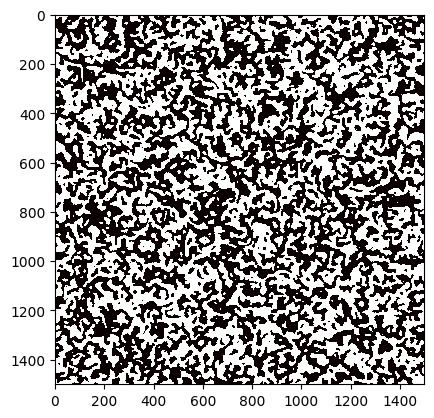

In [2]:
N = 1500  # Size of the lattice, N x N
T = 1  # Temperature in units of energy
num_processes = 8
config = parallel_ising_model(N, mc_steps=512, T=T, num_processes=num_processes)

plt.imshow(config, cmap='hot', interpolation='nearest')
# plt.title(f"2D Ising Model at T={T}, Energy={E:.2f}")
plt.show()

100%|██████████| 125/125 [00:05<00:00, 22.47it/s]


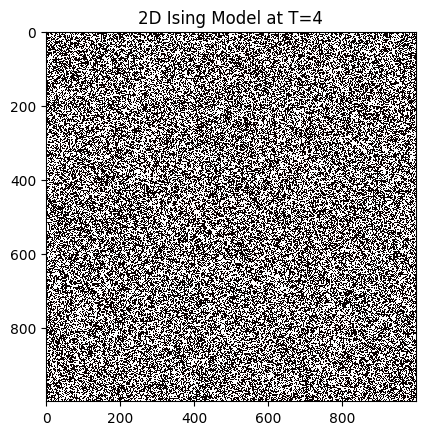

In [20]:
N = 1000  # Size of the lattice, N x N
T = 4  # Temperature in units of energy
num_processes = 8
config = parallel_ising_model(N, mc_steps=1000, T=T, num_processes=num_processes)

plt.imshow(config, cmap='hot', interpolation='nearest')
plt.title(f"2D Ising Model at T={T}")
plt.show()

100%|██████████| 125/125 [00:05<00:00, 23.38it/s]


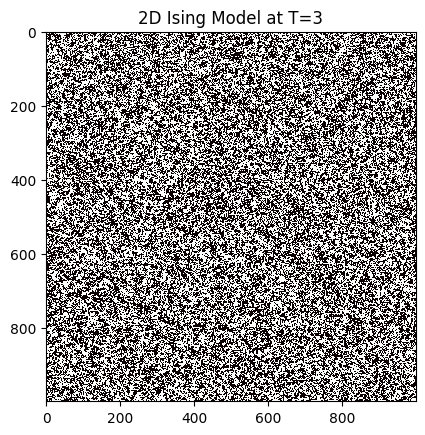

In [21]:
N = 1000  # Size of the lattice, N x N
T = 3  # Temperature in units of energy
num_processes = 8
config = parallel_ising_model(N, mc_steps=1000, T=T, num_processes=num_processes)

plt.imshow(config, cmap='hot', interpolation='nearest')
plt.title(f"2D Ising Model at T={T}")
plt.show()

100%|██████████| 125/125 [00:04<00:00, 25.80it/s]


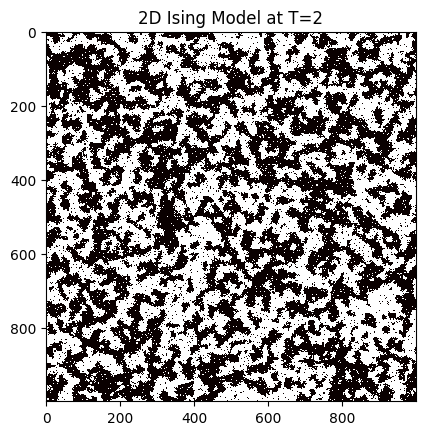

In [22]:
N = 1000  # Size of the lattice, N x N
T = 2  # Temperature in units of energy
num_processes = 8
config = parallel_ising_model(N, mc_steps=1000, T=T, num_processes=num_processes)

plt.imshow(config, cmap='hot', interpolation='nearest')
plt.title(f"2D Ising Model at T={T}")
plt.show()

100%|██████████| 125/125 [00:05<00:00, 24.84it/s]


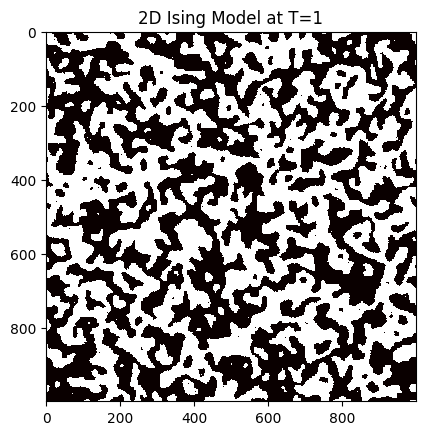

In [23]:
N = 1000  # Size of the lattice, N x N
T = 1  # Temperature in units of energy
num_processes = 8
config = parallel_ising_model(N, mc_steps=1000, T=T, num_processes=num_processes)

plt.imshow(config, cmap='hot', interpolation='nearest')
plt.title(f"2D Ising Model at T={T}")
plt.show()